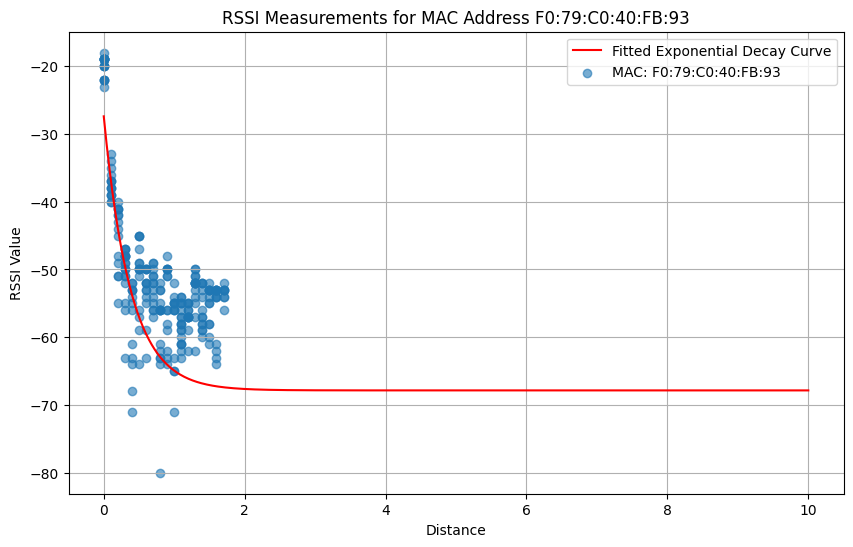

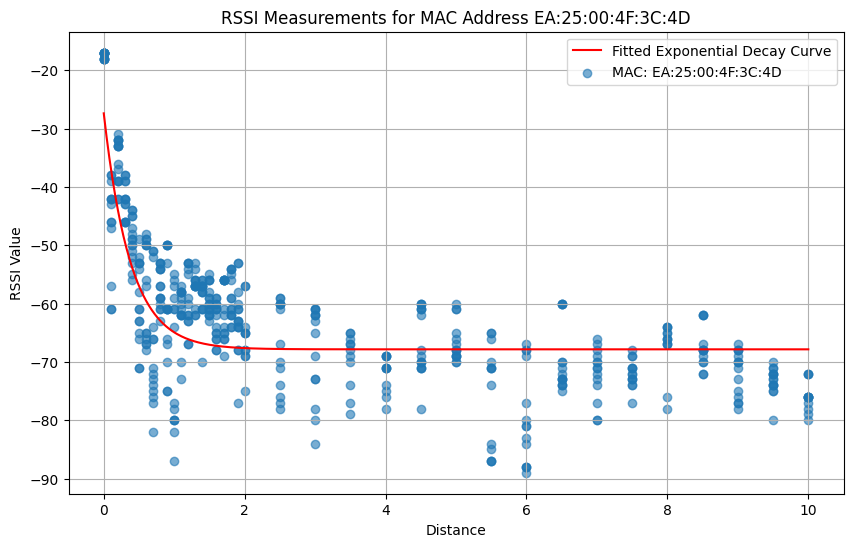

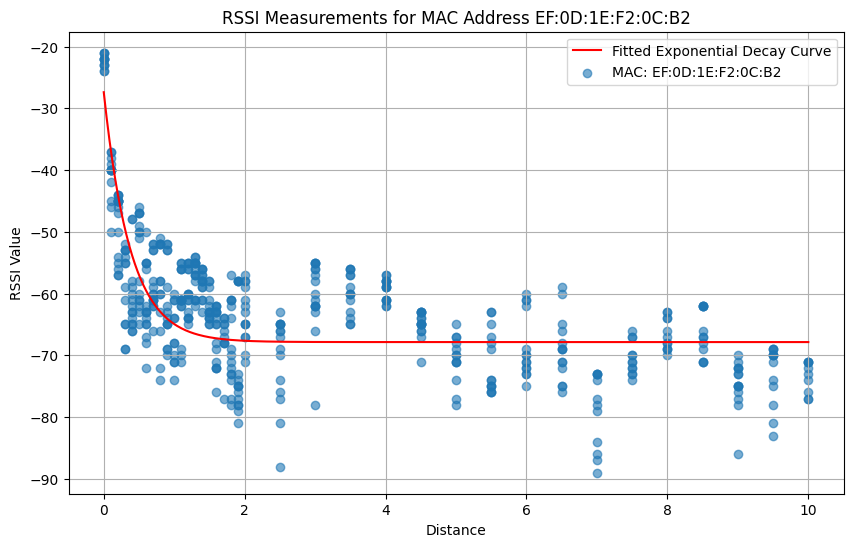

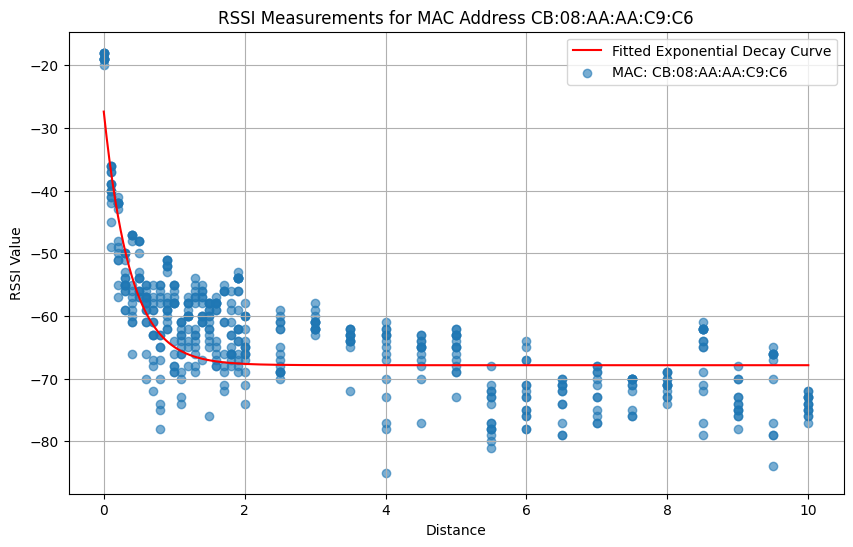

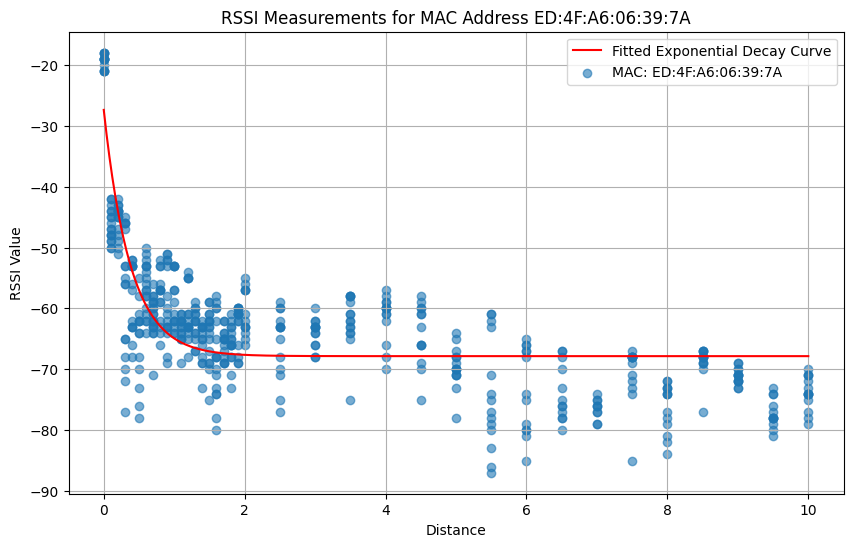

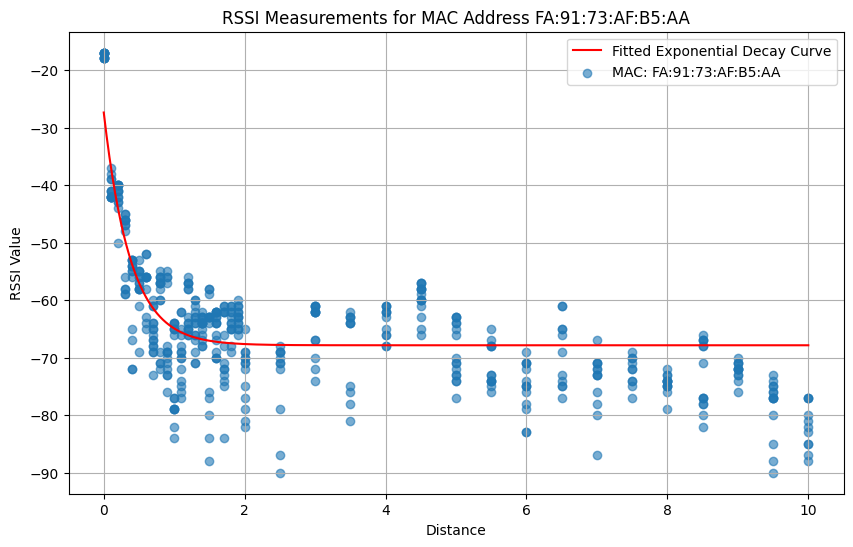

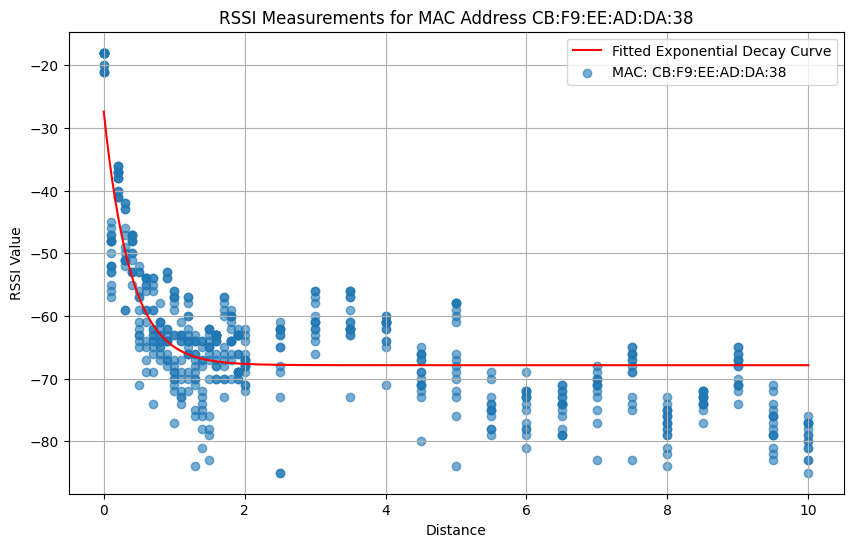

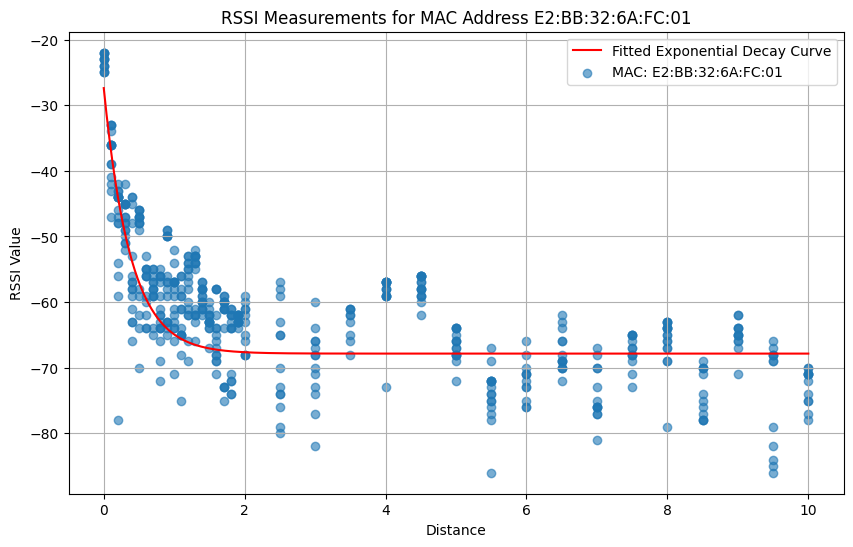

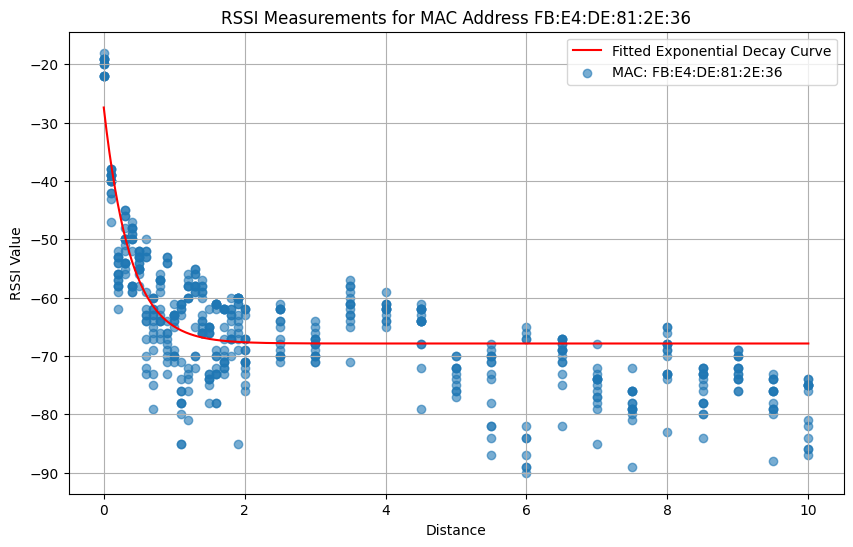

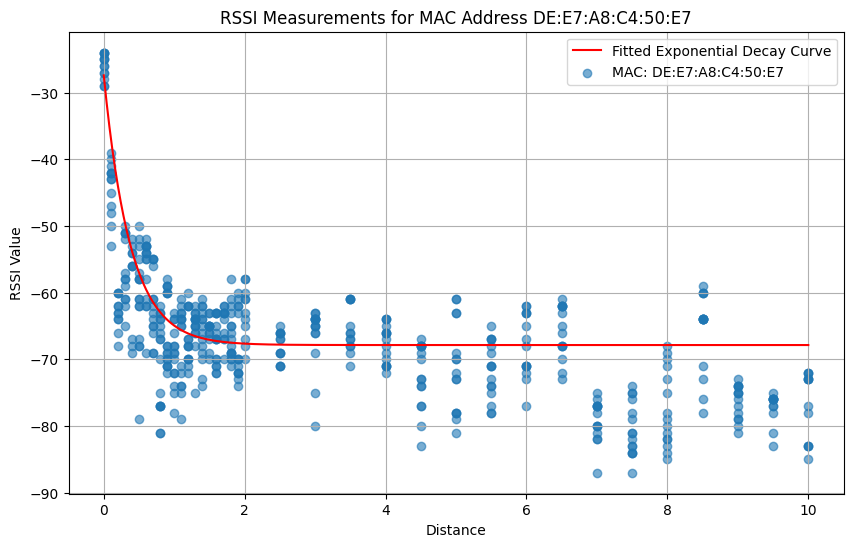

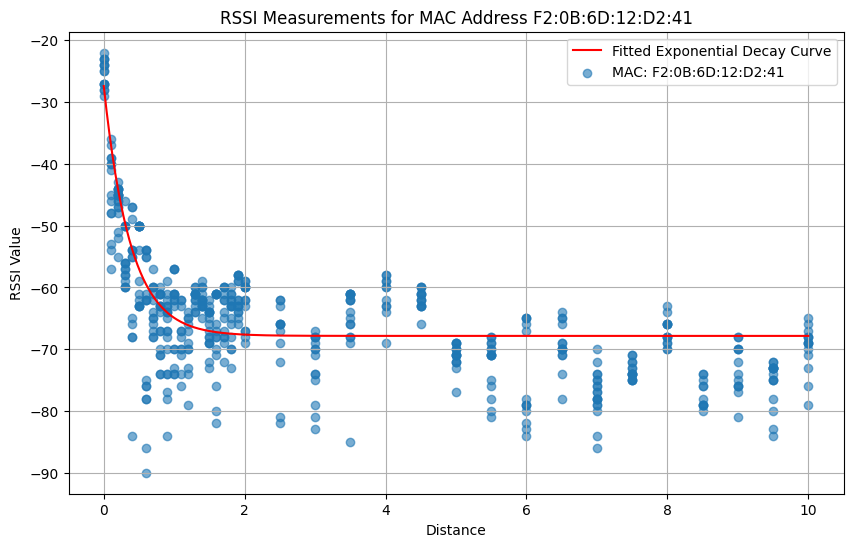

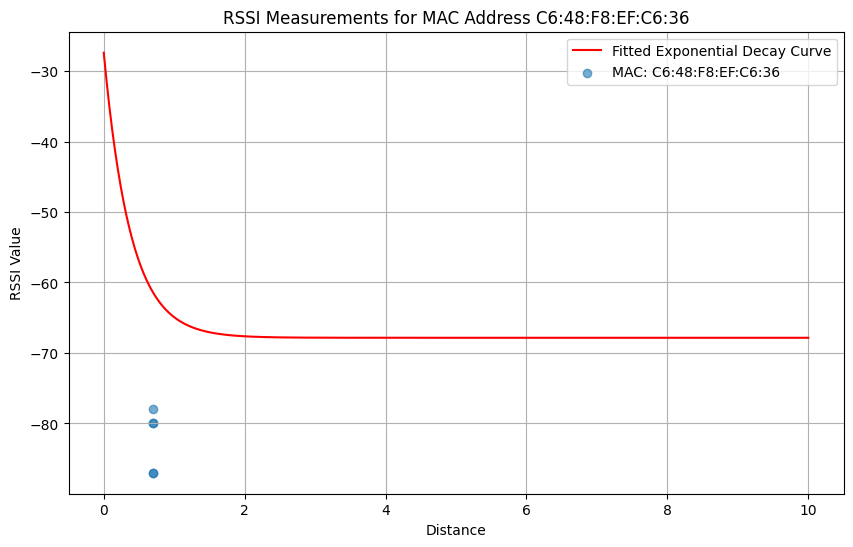

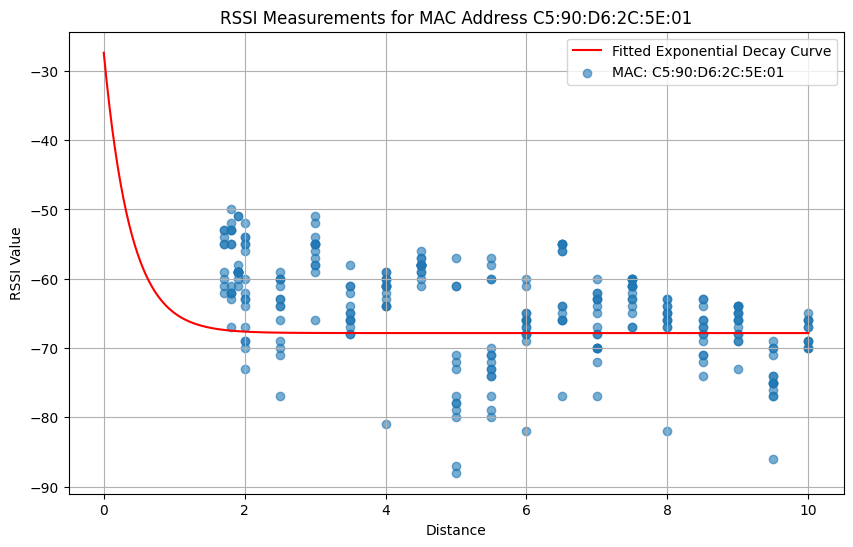

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

file_path = 'Experiment_3.csv'

df = pd.read_csv(file_path)

def exp_decay(distance, a, b, c):
    return a * np.exp(b * distance) + c

average_rssi_per_distance = df.groupby('Distance')['RSSI-Value'].mean().reset_index()
distances = average_rssi_per_distance['Distance'].values
rssi_values = average_rssi_per_distance['RSSI-Value'].values

initial_guesses = [rssi_values.max(), -1, rssi_values.min()]

popt, _ = curve_fit(exp_decay, distances, rssi_values, p0=initial_guesses, maxfev=10000)

unique_macs = df['MAC-Address'].unique()

for mac in unique_macs:
    mac_data = df[df['MAC-Address'] == mac]

    plt.figure(figsize=(10, 6))

    dist_range = np.linspace(distances.min(), distances.max(), 500)
    fitted_curve = exp_decay(dist_range, *popt)
    plt.plot(dist_range, fitted_curve, color='red', label='Fitted Exponential Decay Curve')

    plt.scatter(mac_data['Distance'], mac_data['RSSI-Value'], label=f'MAC: {mac}', alpha=0.6)

    plt.xlabel('Distance')
    plt.ylabel('RSSI Value')
    plt.title(f'RSSI Measurements for MAC Address {mac}')
    plt.legend()
    plt.grid(True)
    plt.show()
